In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from bs4 import BeautifulSoup
import requests
import warnings
warnings.filterwarnings('ignore')

In [26]:
#Carregando nosso DF
homicide_rate_states = pd.read_csv('data/taxa-homicidios_est.csv', delimiter=';')

In [27]:
homicide_rate_states.head()

,cod,nome,período,valor
0,23,CE,1980,8.41
1,22,PI,1980,2.34
2,21,MA,1980,2.70
3,17,TO,1980,0.00
4,16,AP,1980,3.99


In [28]:
#Selecionando as colunas que precisamos
homicide_rate_states = homicide_rate_states.drop(['nome'], axis = 1)
homicide_rate_states.head()

,cod,período,valor
0,23,1980,8.41
1,22,1980,2.34
2,21,1980,2.70
3,17,1980,0.00
4,16,1980,3.99


In [29]:
#Vamos pivotar nosso dataframe
homicide_rate_states_T = homicide_rate_states.pivot_table(index = 'período', columns = 'cod', values = 'valor')
homicide_rate_states_T

cod,11,12,13,14,15,16,17,21,22,23,...,32,33,35,41,42,43,50,51,52,53
período,,,,,,,,,,,,,,,,,,,,,
1980,24.03,8.63,9.65,13.90,8.93,3.99,0.00,2.70,2.34,8.41,...,15.07,26.05,13.76,10.89,6.64,8.14,16.35,3.34,12.15,12.32
1981,23.67,9.02,9.18,17.80,9.57,8.15,0.00,3.56,3.40,9.23,...,17.17,21.92,16.42,12.08,7.33,8.43,17.98,6.38,18.78,13.89
1982,20.46,12.76,10.16,28.18,9.87,11.81,0.00,3.51,5.01,9.04,...,16.68,18.87,15.99,13.85,7.03,8.60,18.82,5.03,18.38,15.76
1983,21.46,9.93,9.38,17.24,12.03,13.62,0.00,3.86,5.54,11.01,...,16.77,15.94,21.87,14.69,8.19,8.15,20.49,10.40,17.95,14.03
1984,28.66,10.49,12.50,13.18,13.18,11.55,0.00,4.25,4.09,10.45,...,18.02,20.85,25.84,13.45,7.45,8.30,22.40,13.30,16.29,12.41
1985,40.77,14.40,10.60,8.45,12.35,14.97,0.00,3.66,3.25,9.50,...,19.91,21.21,25.08,11.51,6.50,8.11,16.26,17.51,14.82,18.25
1986,44.05,16.99,8.84,8.39,13.69,12.62,0.00,5.75,4.32,8.86,...,20.65,20.25,25.14,11.53,5.81,9.04,18.06,21.97,15.53,17.46
1987,47.50,26.09,9.89,4.18,12.39,10.07,0.00,6.27,3.39,7.28,...,22.45,30.95,27.18,11.31,7.53,9.51,19.18,22.39,17.40,22.38
1988,45.06,19.68,11.87,38.88,13.00,7.74,0.00,7.33,5.73,8.36,...,27.70,24.72,25.14,12.20,7.64,12.54,19.11,21.11,20.93,20.86


In [30]:
homidicide_rate_states_T = homicide_rate_states_T.reset_index(inplace = True)


In [31]:
print(homicide_rate_states_T)

cod  período     11     12     13     14     15     16     17     21     22  \
0       1980  24.03   8.63   9.65  13.90   8.93   3.99   0.00   2.70   2.34   
1       1981  23.67   9.02   9.18  17.80   9.57   8.15   0.00   3.56   3.40   
2       1982  20.46  12.76  10.16  28.18   9.87  11.81   0.00   3.51   5.01   
3       1983  21.46   9.93   9.38  17.24  12.03  13.62   0.00   3.86   5.54   
4       1984  28.66  10.49  12.50  13.18  13.18  11.55   0.00   4.25   4.09   
5       1985  40.77  14.40  10.60   8.45  12.35  14.97   0.00   3.66   3.25   
6       1986  44.05  16.99   8.84   8.39  13.69  12.62   0.00   5.75   4.32   
7       1987  47.50  26.09   9.89   4.18  12.39  10.07   0.00   6.27   3.39   
8       1988  45.06  19.68  11.87  38.88  13.00   7.74   0.00   7.33   5.73   
9       1989  48.28  23.97  16.22  58.81  14.27  14.53   7.11   8.64   5.68   
10      1990  51.89  15.75  18.02  62.26  15.59  16.54   5.99   9.14   4.29   
11      1991  43.35  25.38  19.16  36.31  16.36  18.

In [32]:
homicide_rate_states_T = homicide_rate_states_T.rename(columns = {'período': 'time'})
homicide_rate_states_T.head()

cod,time,11,12,13,14,15,16,17,21,22,...,32,33,35,41,42,43,50,51,52,53
0,1980,24.03,8.63,9.65,13.90,8.93,3.99,0.0,2.70,2.34,...,15.07,26.05,13.76,10.89,6.64,8.14,16.35,3.34,12.15,12.32
1,1981,23.67,9.02,9.18,17.80,9.57,8.15,0.0,3.56,3.40,...,17.17,21.92,16.42,12.08,7.33,8.43,17.98,6.38,18.78,13.89
2,1982,20.46,12.76,10.16,28.18,9.87,11.81,0.0,3.51,5.01,...,16.68,18.87,15.99,13.85,7.03,8.60,18.82,5.03,18.38,15.76
3,1983,21.46,9.93,9.38,17.24,12.03,13.62,0.0,3.86,5.54,...,16.77,15.94,21.87,14.69,8.19,8.15,20.49,10.40,17.95,14.03
4,1984,28.66,10.49,12.50,13.18,13.18,11.55,0.0,4.25,4.09,...,18.02,20.85,25.84,13.45,7.45,8.30,22.40,13.30,16.29,12.41


In [33]:
homicide_rate_states_T = homicide_rate_states_T.drop(homicide_rate_states_T[homicide_rate_states_T.apply(lambda x: any(x == 0), axis=1)].index)
print(homicide_rate_states_T)

cod  time     11     12     13     14     15     16     17     21     22  ...  \
9    1989  48.28  23.97  16.22  58.81  14.27  14.53   7.11   8.64   5.68  ...   
10   1990  51.89  15.75  18.02  62.26  15.59  16.54   5.99   9.14   4.29  ...   
11   1991  43.35  25.38  19.16  36.31  16.36  18.66  10.00   9.53   3.99  ...   
12   1992  34.33  24.90  16.29  42.61  15.02  23.88   7.10   8.57   3.54  ...   
13   1993  40.11  26.51  15.78  28.62  11.95  21.37   9.59   7.74   4.40  ...   
14   1994  30.90  19.71  17.05  30.98  13.43  39.36  11.00   6.08   3.68  ...   
15   1995  24.64  22.62  18.32  33.18  12.85  38.02   7.65   7.36   4.18  ...   
16   1996  24.49  21.51  18.83  43.30  12.70  41.37  12.02   6.95   4.38  ...   
17   1997  28.28  19.99  19.02  35.36  13.34  34.83  10.36   6.29   5.27  ...   
18   1998  38.71  21.40  21.18  51.40  13.42  38.02  11.64   5.19   5.16  ...   
19   1999  33.31   9.66  20.42  57.69  10.91  43.66  12.07   4.84   4.86  ...   
20   2000  35.37  19.56  20.

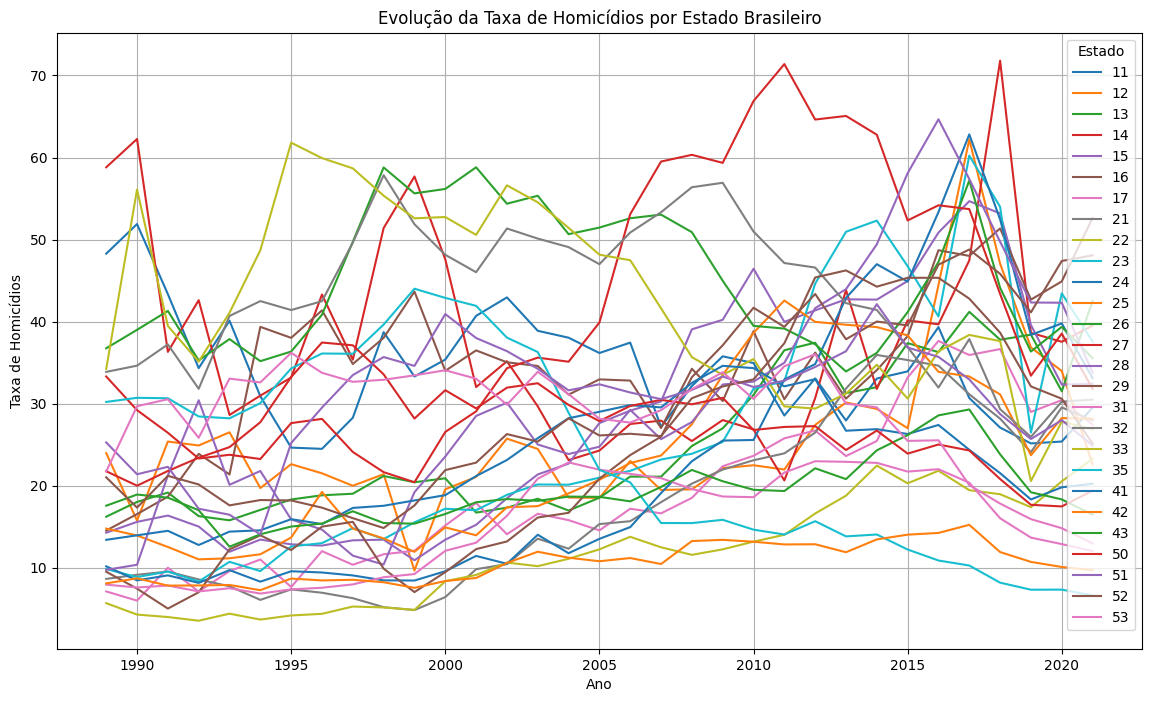

In [34]:
# Plotando o gráfico de linhas
plt.figure(figsize=(14, 8))
for column in homicide_rate_states_T.columns[1:]:
    plt.plot(homicide_rate_states_T['time'], homicide_rate_states_T[column], label=column)

plt.xlabel('Ano')
plt.ylabel('Taxa de Homicídios')
plt.title('Evolução da Taxa de Homicídios por Estado Brasileiro')
plt.legend(title='Estado')
plt.grid(True)
plt.show()

In [ ]:
df_filtered = df[(df['time'] >= 2010) & (df['time'] <= 2021)]

In [ ]:
#Salvando nosso DF
homicide_rate_states = homicide_rate_states_T
homicide_rate_states.to_csv('/content/drive/MyDrive/Bases de Dados para Indicadores EUROFOUND/Bases Finais/homicide_rate_states.csv', encoding='UTF-8', index = False)